In [34]:
import keras
try:
    from keras.utils import to_categorical
except:
    from tensorflow.keras.utils import to_categorical
    
from keras.datasets import mnist
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
import numpy as np
import PIL

In [10]:
def showImages(images, labels, offset=0):
    class_names = [str(i) for i in range(10)]

    fig = plt.figure(figsize=(10, 10))
    for i in range(30):
        plt.subplot(5, 6, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i + offset], cmap="gray")
        plt.xlabel(class_names[int(labels[i + offset])])

    fig.patch.set_facecolor('w')

In [11]:
# Get the data, train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Use 20% of the train data as validation
x_train, x_validation, y_train, y_validation = train_test_split(
    x_train, y_train, test_size=0.2, random_state=69
)

print(f"Images have shape {x_train.shape[1:]}")
# print(f"First Image: {x_train[0]}")
print(f"We have {x_train.shape[0]} images of size {x_train.shape[1]}x{x_train.shape[2]} for training!")

print(f"We have {x_validation.shape[0]} images of size {x_validation.shape[1]}x{x_validation.shape[2]} for validation!")

print(f"We have {x_test.shape[0]} images of size {x_test.shape[1]}x{x_test.shape[2]} for testing!")

Images have shape (28, 28)
We have 48000 images of size 28x28 for training!
We have 12000 images of size 28x28 for validation!
We have 10000 images of size 28x28 for testing!


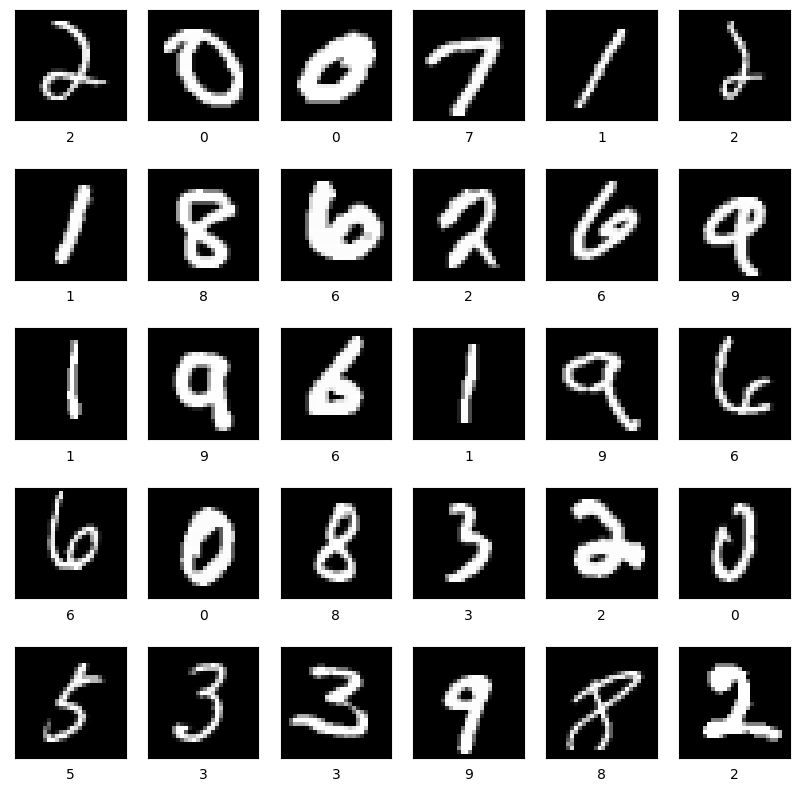

In [12]:
showImages(x_train, y_train, 10)

In [13]:
#Reshape
input_shape = (28, 28, 1)

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_validation = x_validation.reshape(x_validation.shape[0], 28, 28, 1)

# convert class vectors to binary class matrices
y_train = to_categorical(y_train, 10)
y_validation = to_categorical(y_validation, 10)
y_test = to_categorical(y_test, 10)
print(f"first label: {y_train[0]}")

x_train = x_train.astype('float32')
x_validation = x_validation.astype('float32')
x_test = x_test.astype('float32')

#NORMALIZAR
x_train /= 255
x_validation /= 255
x_test /= 255

print('x_train shape:', x_train.shape)

first label: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x_train shape: (48000, 28, 28, 1)


In [14]:
batch_size = 128
num_classes = 10
epochs = 10

In [15]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [16]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer="adam", metrics=['accuracy'])

In [17]:
#No meu pc (andre) demora tipo 2m30s
history = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_validation, y_validation))

Epoch 1/10
375/375 [==============================] - 22s 56ms/step - loss: 0.4566 - accuracy: 0.8565 - val_loss: 0.0779 - val_accuracy: 0.9775
Epoch 2/10
375/375 [==============================] - 21s 57ms/step - loss: 0.1338 - accuracy: 0.9644 - val_loss: 0.0571 - val_accuracy: 0.9832
Epoch 3/10
375/375 [==============================] - 21s 57ms/step - loss: 0.0915 - accuracy: 0.9759 - val_loss: 0.0505 - val_accuracy: 0.9862
Epoch 4/10
375/375 [==============================] - 20s 52ms/step - loss: 0.0729 - accuracy: 0.9806 - val_loss: 0.0525 - val_accuracy: 0.9865
Epoch 5/10
375/375 [==============================] - 20s 52ms/step - loss: 0.0608 - accuracy: 0.9843 - val_loss: 0.0359 - val_accuracy: 0.9908
Epoch 6/10
375/375 [==============================] - 19s 49ms/step - loss: 0.0508 - accuracy: 0.9866 - val_loss: 0.0354 - val_accuracy: 0.9904
Epoch 7/10
375/375 [==============================] - 17s 45ms/step - loss: 0.0466 - accuracy: 0.9879 - val_loss: 0.0360 - val_accuracy:

Validation: acc is 99.15000200271606% and loss is 0.034157972782850266


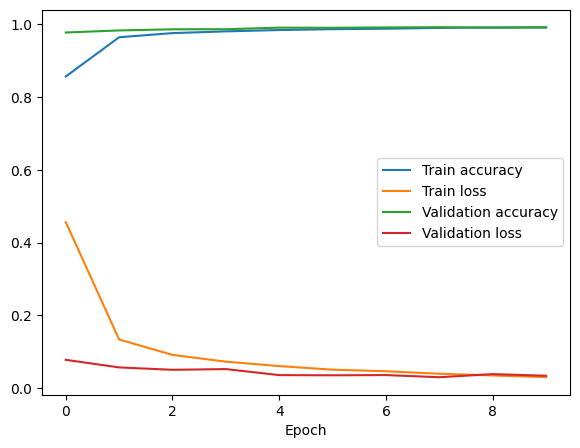

In [18]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train accuracy")
plt.plot(history.history["loss"], label="Train loss")
plt.plot(history.history["val_accuracy"], label="Validation accuracy")
plt.plot(history.history["val_loss"], label="Validation loss")
plt.xlabel("Epoch")
plt.legend(loc="best")

validation_loss, validation_acc = model.evaluate(x_validation, y_validation, verbose=False)

print(f"Validation: acc is {validation_acc*100}% and loss is {validation_loss}")

In [19]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1]*100)

Test loss: 0.027791230008006096
Test accuracy: 99.22000169754028


313/313 [==============================] - 2s 6ms/step


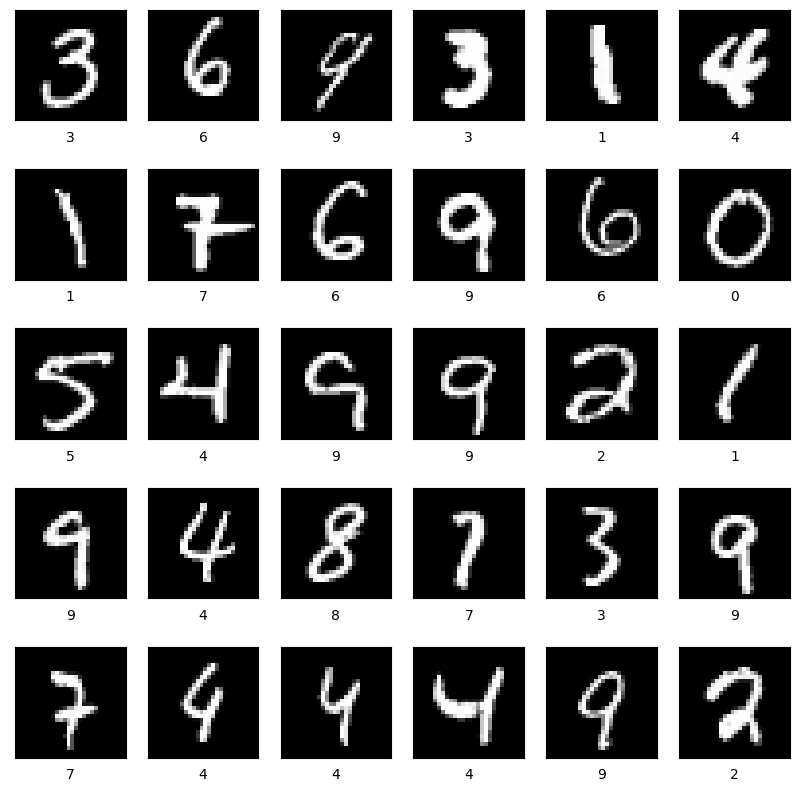

In [30]:
predictions = model.predict(x_test)
predictions = np.argmax(predictions, axis=1)

showImages(x_test, predictions, 90)

In [31]:
model.save("model.h5")

1/1 [==============================] - 0s 38ms/step
2


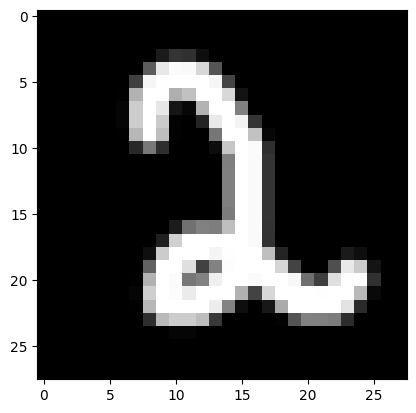

In [48]:
image = PIL.Image.open("Untitled.png").convert("L").resize((28, 28))

image_array = np.asarray(image)

image_array = 1 - (image_array.reshape(1, 28, 28, 1) / 255)

predicted = model.predict(image_array)

plt.imshow(image_array[0], cmap="gray")

class_names = [str(i) for i in range(10)]
print(class_names[int(np.argmax(predicted))])